# Data classification

# Features Selection with SV

## Étape 1 : Entraîner un modèle XGBoost avec toutes les features

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

final_df = pd.read_csv('balanced_dataset_all.csv')
feature_cols = [
    'Minimum', 'Maximum', 'Mean', 'RMS', 'STD', 'MeanSTD6h', 'STDMean6h', 'STDSD',
    'RMSSD', 'Mode', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75',
    'Skewness', 'Kurtosis'
] + [f'Autocorr{i}' for i in range(1, 12)] + [f'h{i}' for i in range(1, 5)]

In [ ]:

# Features et labels
X = final_df[feature_cols]
label = ['oestrus', 'lameness', 'mastitis', 'other_disease','OK']
y = final_df[label]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle multilabel via MultiOutputClassifier
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)


c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:15:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:15:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:15:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:16:02] WARNING: C:\actio

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))

## Étape 2 : Calculer les SHAP values

c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Traitement de la condition: oestrus
Traitement de la condition: lameness
Traitement de la condition: mastitis
Traitement de la condition: other_disease
Traitement de la condition: OK


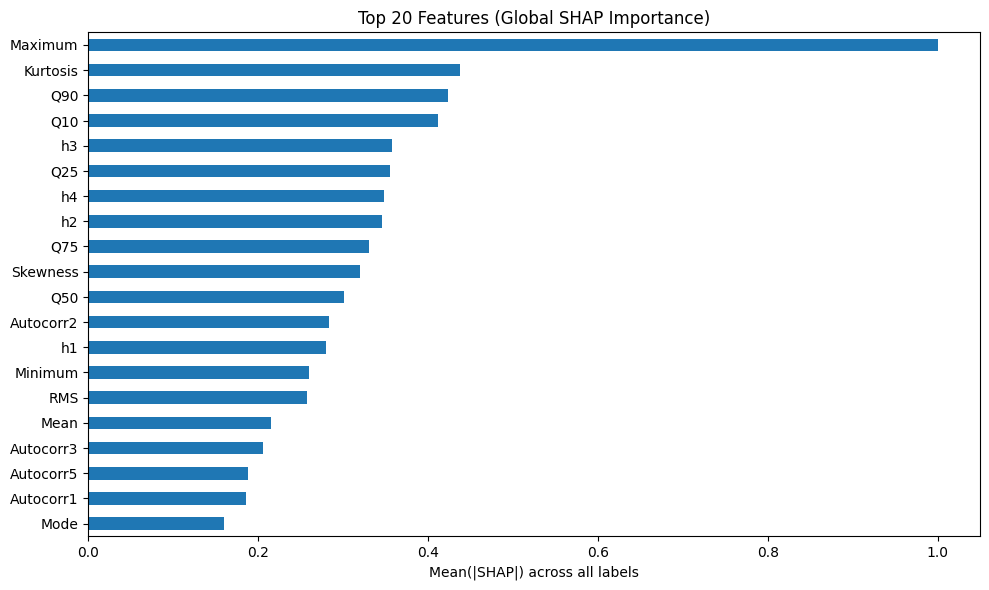

,oestrus,lameness,mastitis,other_disease,OK,mean_global
Maximum,1.747902,0.753579,1.626658,0.624655,0.247337,1.000026
Kurtosis,0.231991,0.786249,0.516417,0.426803,0.229947,0.438281
Q90,0.787652,0.229843,0.324015,0.622113,0.154299,0.423585
Q10,0.352093,0.209084,0.947911,0.430568,0.119385,0.411808
h3,0.240624,0.242580,0.691214,0.543728,0.072031,0.358035
Q25,0.232720,0.282004,0.860887,0.282625,0.120153,0.355678
h4,0.263591,0.289264,0.821388,0.266530,0.102279,0.348610
h2,0.367493,0.273233,0.743954,0.272283,0.071780,0.345749
Q75,0.477705,0.248461,0.407500,0.284632,0.236990,0.331058
Skewness,0.517847,0.321537,0.507885,0.181175,0.072833,0.320255


In [ ]:
import shap
import numpy as np

# Stockage des SHAP moyens pour chaque feature par label
shap_matrix = pd.DataFrame(index=X_test.columns)

# Boucle sur chaque label
for i, target in enumerate(label):
    print(f"Traitement de la condition: {target}")

    single_model = multi_model.estimators_[i]
    explainer = shap.Explainer(single_model)
    shap_values = explainer(X_test)

    mean_shap = np.abs(shap_values.values).mean(axis=0)

    # Ajouter les valeurs dans la matrice
    shap_matrix[target] = mean_shap

# Moyenne globale des SHAP values par feature
shap_matrix['mean_global'] = shap_matrix.mean(axis=1)

# Tri des features par importance globale
shap_ranked = shap_matrix.sort_values('mean_global', ascending=False)

# Affichage du top 20
top_features = shap_ranked.head(20)

# Visualisation
plt.figure(figsize=(10, 6))
top_features['mean_global'].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Features (Global SHAP Importance)")
plt.xlabel("Mean(|SHAP|) across all labels")
plt.tight_layout()
plt.show()

display(top_features)


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier

import numpy as np
import pandas as pd

# Train-test split (refait pour clarté)
X = final_df[feature_cols]
y = final_df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 1: Entraîner le modèle initial pour obtenir les SHAP values
base_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)

# Calcul des SHAP moyens globaux
shap_matrix = pd.DataFrame(index=X_test.columns)

for i, target in enumerate(label):
    explainer = shap.Explainer(multi_model.estimators_[i])
    shap_values = explainer(X_test)
    mean_shap = np.abs(shap_values.values).mean(axis=0)
    shap_matrix[target] = mean_shap

shap_matrix['mean_global'] = shap_matrix.mean(axis=1)

# Étape 2: Essai de plusieurs seuils pour la sélection de features
thresholds = np.arange(0.05, 0.3, 0.02)
results = []

for threshold in thresholds:
    selected_features = shap_matrix[shap_matrix['mean_global'] >= threshold].index.tolist()

    if not selected_features:
        print(f"🔴 Seuil {threshold}: aucune feature sélectionnée.")
        continue

    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_sel = MultiOutputClassifier(xgb.XGBClassifier(eval_metric='logloss'))
    model_sel.fit(X_train_sel, y_train)

    y_pred = model_sel.predict(X_test_sel)

    # Évaluation multilabel
    f1 = np.mean([f1_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0, average='macro') for i in range(y.shape[1])])
    precision = np.mean([precision_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0) for i in range(y.shape[1])])
    recall = np.mean([recall_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0) for i in range(y.shape[1])])

    # Gestion AUC (nécessite predict_proba et au moins deux classes présentes)
    try:
        y_prob = np.column_stack([model_sel.estimators_[i].predict_proba(X_test_sel)[:, 1] for i in range(y.shape[1])])
        auc = np.mean([roc_auc_score(y_test.iloc[:, i], y_prob[:, i]) for i in range(y.shape[1])])
    except Exception as e:
        auc = np.nan

    print(f"✅ Seuil {threshold:.3f} | {len(selected_features)} features | F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | AUC: {auc:.4f}")

    results.append({
        'threshold': threshold,
        'num_features': len(selected_features),
        'f1_macro': f1,
        'precision_macro': precision,
        'recall_macro': recall,
        'roc_auc_macro': auc
    })

# Résumé
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='f1_macro', ascending=False))

c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:18:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:18:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:18:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayagr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:18:31] WARNING: C:\actio

✅ Seuil 0.050 | 32 features | F1: 0.8293 | Precision: 0.6353 | Recall: 0.7383 | AUC: 0.9317
✅ Seuil 0.070 | 32 features | F1: 0.8293 | Precision: 0.6353 | Recall: 0.7383 | AUC: 0.9317
✅ Seuil 0.090 | 31 features | F1: 0.8297 | Precision: 0.6352 | Recall: 0.7403 | AUC: 0.9317
✅ Seuil 0.110 | 29 features | F1: 0.8305 | Precision: 0.6355 | Recall: 0.7433 | AUC: 0.9316
✅ Seuil 0.130 | 28 features | F1: 0.8302 | Precision: 0.6354 | Recall: 0.7423 | AUC: 0.9318
✅ Seuil 0.150 | 21 features | F1: 0.8301 | Precision: 0.6337 | Recall: 0.7443 | AUC: 0.9327
✅ Seuil 0.170 | 19 features | F1: 0.8300 | Precision: 0.6336 | Recall: 0.7441 | AUC: 0.9328
✅ Seuil 0.190 | 17 features | F1: 0.8302 | Precision: 0.6334 | Recall: 0.7457 | AUC: 0.9336
✅ Seuil 0.210 | 16 features | F1: 0.8296 | Precision: 0.6324 | Recall: 0.7442 | AUC: 0.9340
✅ Seuil 0.230 | 15 features | F1: 0.8302 | Precision: 0.6329 | Recall: 0.7465 | AUC: 0.9337
✅ Seuil 0.250 | 15 features | F1: 0.8302 | Precision: 0.6329 | Recall: 0.7465 | 

,threshold,num_features,f1_macro,precision_macro,recall_macro,roc_auc_macro
3,0.11,29,0.830474,0.635530,0.743301,0.931635
7,0.19,17,0.830246,0.633415,0.745685,0.933566
4,0.13,28,0.830226,0.635358,0.742350,0.931840
9,0.23,15,0.830213,0.632900,0.746489,0.933687
10,0.25,15,0.830213,0.632900,0.746489,0.933687
5,0.15,21,0.830060,0.633736,0.744260,0.932699
6,0.17,19,0.829985,0.633649,0.744135,0.932827
2,0.09,31,0.829707,0.635241,0.740275,0.931736
8,0.21,16,0.829586,0.632439,0.744226,0.933973
1,0.07,32,0.829295,0.635278,0.738296,0.931727


### Optimal :Seuil 0.15 | 23 features | F1: 0.950244 | Precision: 0.963512 | Recall: 0.849105 | AUC: 0.998962

In [ ]:
threshold = 0.15
selected_features = shap_matrix[shap_matrix['mean_global'] >= threshold].index.tolist()

print(f"🎯 Seuil choisi = {threshold}")
print(f"✅ {len(selected_features)} features sélectionnées :\n{selected_features}")

🎯 Seuil choisi = 0.15
✅ 21 features sélectionnées :
['Minimum', 'Maximum', 'Mean', 'RMS', 'Mode', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1', 'Autocorr2', 'Autocorr3', 'Autocorr5', 'Autocorr11', 'h1', 'h2', 'h3', 'h4']


In [ ]:
print(final_df.columns)

Index(['cow', 'duration_hours', 'Minimum', 'Maximum', 'Mean', 'RMS', 'STD',
       'MeanSTD6h', 'STDMean6h', 'STDSD', 'RMSSD', 'Mode', 'Q10', 'Q90', 'Q25',
       'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1', 'Autocorr2',
       'Autocorr3', 'Autocorr4', 'Autocorr5', 'Autocorr6', 'Autocorr7',
       'Autocorr8', 'Autocorr9', 'Autocorr10', 'Autocorr11', 'h1', 'h2', 'h3',
       'h4', 'calving', 'oestrus', 'lameness', 'mastitis', 'other_disease',
       'OK'],
      dtype='object')


In [ ]:
selected_features=['Minimum', 'Maximum', 'Mean', 'RMS', 'Q10', 'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1', 'Autocorr2', 'Autocorr3', 'Autocorr5', 'Autocorr9', 'h1', 'h2', 'h3', 'h4']
import pandas as pd
if selected_features:
    # Update X_train and X_test with only the selected columns
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    # Optionally, save the updated dataset to a CSV file
    final_selected_df = final_df[selected_features]
    features_columns = ['cow','duration_hours']
    label_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'other_disease','OK']

    # Combine features and labels
    final_selected_df_1 = pd.concat([
        final_df[features_columns],
        final_selected_df,
        final_df[label_columns]
    ], axis=1)

    final_selected_df_1.to_csv('selected_features_after_augmentation.csv', index=False)
    print("Selected features dataset saved to 'selected_features_after_augmentations.csv'.")
    print(final_selected_df_1.head())
else:
        print("No features selected for the given threshold.")

Selected features dataset saved to 'selected_features_after_augmentations.csv'.
   cow  duration_hours    Minimum     Maximum       Mean         RMS  \
0  156              24 -827.99977  1510.84206 -54.151572  919.804455   
1  156              24 -827.99977  1510.84206 -53.558642  919.281855   
2  156              24 -827.99977  1510.84206 -51.643205  917.622441   
3  156              24 -827.99977  1510.84206 -51.905188  917.846456   
4  156              24 -827.99977  1510.84206 -49.251368  915.544739   

          Q10          Q90         Q25        Q50  ...           h1  \
0 -823.678687  1477.729225 -793.411938 -687.79984  ...  3456.714454   
1 -823.678687  1477.729225 -789.921730 -687.79984  ...  3447.014309   
2 -823.271527  1477.729225 -782.554630 -687.79984  ...  3425.753901   
3 -823.271527  1477.729225 -786.052345 -687.79984  ...  3427.088874   
4 -813.129421  1477.729225 -775.889140 -687.79984  ...  3430.668420   

            h2           h3           h4  oestrus  calving  

In [ ]:
print(final_selected_df_1.columns)

Index(['cow', 'duration_hours', 'Minimum', 'Maximum', 'Mean', 'RMS', 'Q10',
       'Q90', 'Q25', 'Q50', 'Q75', 'Skewness', 'Kurtosis', 'Autocorr1',
       'Autocorr2', 'Autocorr3', 'Autocorr5', 'Autocorr9', 'h1', 'h2', 'h3',
       'h4', 'oestrus', 'calving', 'lameness', 'mastitis', 'other_disease',
       'OK'],
      dtype='object')
